<a href="https://colab.research.google.com/github/helomelo1/Pairs-Trading-Strategy-and-Learning-Quant-Trading/blob/main/Integration_Cointegration_and_Stationarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

import yfinance as yf

In [8]:
def gen_datapoint(param):
  mean = param[0]
  std = param[1]

  return np.random.normal(mean, std)

# Stationarity

Text(0, 0.5, 'Value')

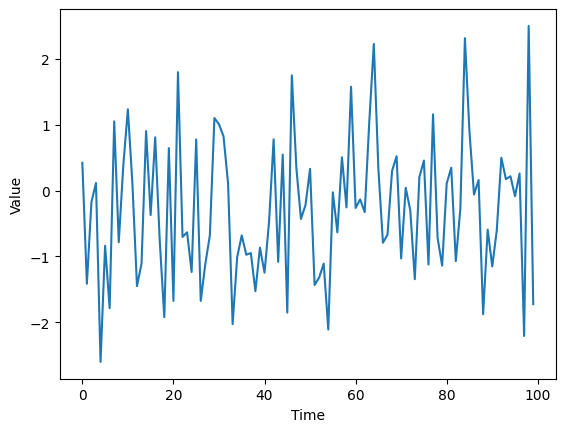

In [9]:
# Generating a Stationary Time Series
param = (0, 1)
T = 100

stationary_series = pd.Series(index=range(1))

for t in range(T):
  stationary_series[t] = gen_datapoint(param)

plt.plot(stationary_series)
plt.xlabel("Time")
plt.ylabel("Value")

Text(0, 0.5, 'Value')

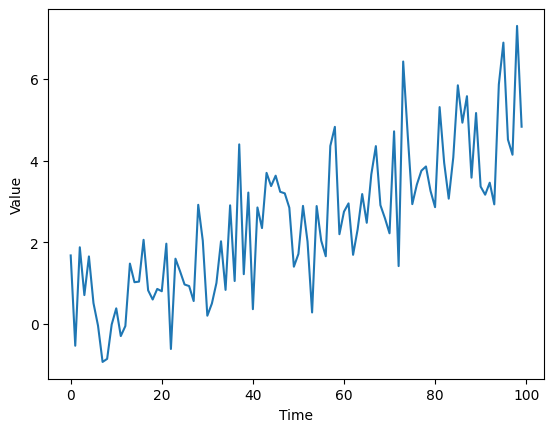

In [10]:
# Genarating a non-stationary time series
T = 100
non_stationary_series = pd.Series(index=range(1))

for t in range(T):
  param = (t * 0.05, 1)
  non_stationary_series[t] = gen_datapoint(param)

plt.plot(non_stationary_series)
plt.xlabel("Time")
plt.ylabel("Value")

In [11]:
# Checking for stationarity using the Augmented Dicky Fuller test
def check_for_st(X, cutoff=0.05):
  p_value = adfuller(X)[1]
  if p_value <= cutoff:
    print("The series is stationary")
    return True
  else:
    print("The series is not stationary")
    return False

print(check_for_st(stationary_series))
print(check_for_st(non_stationary_series))

The series is stationary
True
The series is not stationary
False


Text(0, 0.5, 'Value')

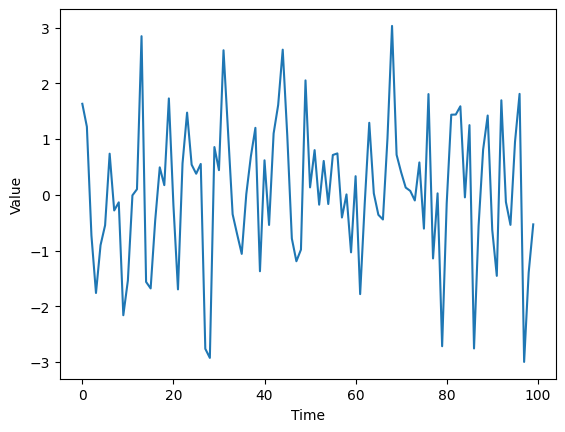

In [12]:
# But the above test doesn't work
# For E.g.

series = pd.Series(index=range(1))
T = 100

for t in range(T):
  param = (np.cos(t), 1)
  series[t] = gen_datapoint(param)

plt.plot(series)
plt.xlabel("Time")
plt.ylabel("Value")

# Integration

Text(0, 0.5, 'Value')

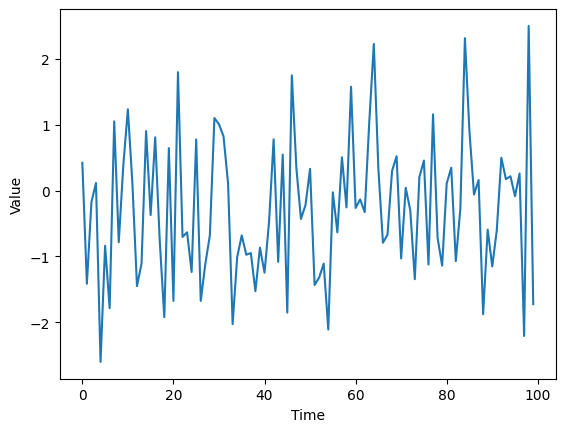

In [13]:
# Order of zero integration

plt.plot(stationary_series)
plt.xlabel("Time")
plt.ylabel("Value")

Text(0, 0.5, 'Value')

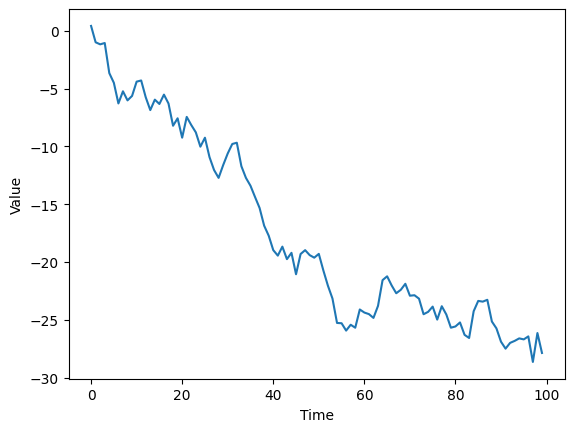

In [14]:
# Order of one integration series
series_A1 = np.cumsum(stationary_series)

plt.plot(series_A1)
plt.xlabel("Time")
plt.ylabel("Value")

Text(0, 0.5, 'Value')

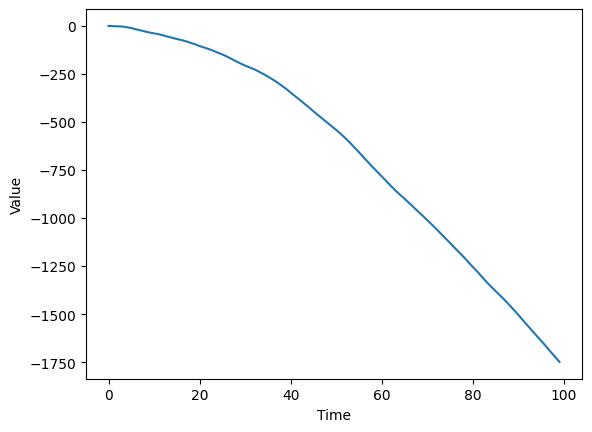

In [15]:
# Same for the order of 2
series_A2 = np.cumsum(series_A1)

plt.plot(series_A2)
plt.xlabel("Time")
plt.ylabel("Value")

In [16]:
time_series = yf.download("MSFT", "2023-01-01", "2025-01-01")['Close']
check_for_st(time_series)

/tmp/ipython-input-2928548586.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  time_series = yf.download("MSFT", "2023-01-01", "2025-01-01")['Close']
[*********************100%***********************]  1 of 1 completed

The series is not stationary


False

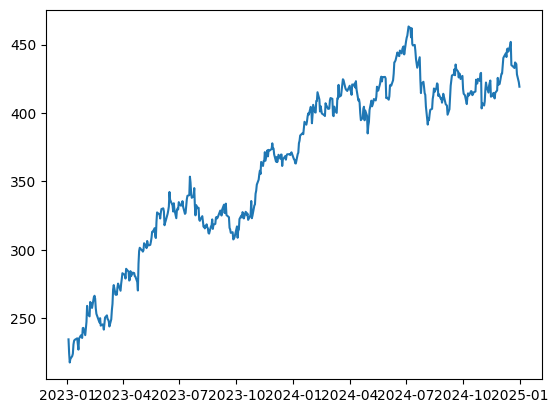

In [17]:
plt.plot(time_series)

The series is stationary


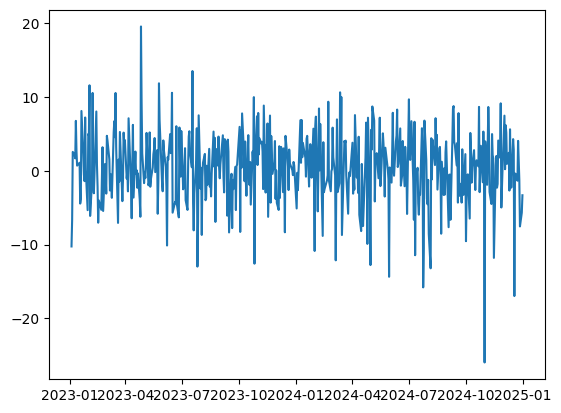

In [18]:
series_1 = time_series.diff()[1:]
check_for_st(series_1)
plt.plot(series_1)

The series is stationary


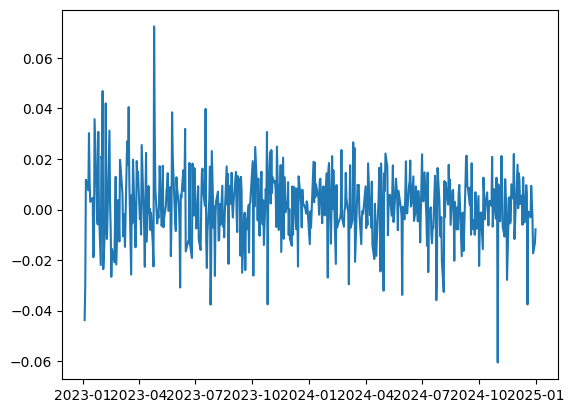

In [19]:
series_2 = time_series.pct_change()[1:]
check_for_st(series_2)
plt.plot(series_2)

# Cointegration


Two series are called conintegrated when some series are order of one integrated [I(0)] and then linear combination of some of them is order of zero integrated [I(0)].

In [20]:
T = 100
s1 = np.random.normal(0, 1, T)
s1 = np.cumsum(s1)
s1 = pd.Series(s1)

s2 = s1 + np.random.normal(0, 1, T)

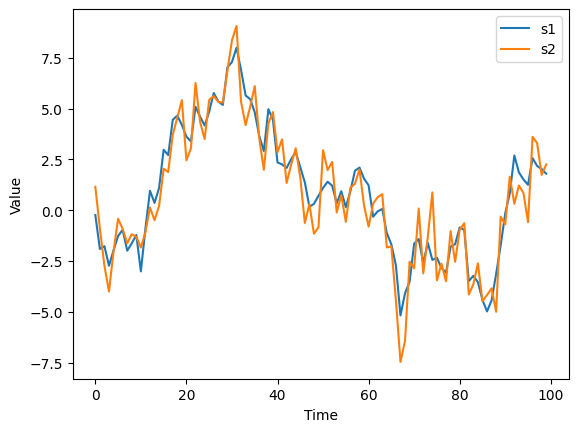

In [21]:
plt.plot(s1)
plt.plot(s2)
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend(["s1", "s2"])

The series is stationary


Text(0, 0.5, 'Value')

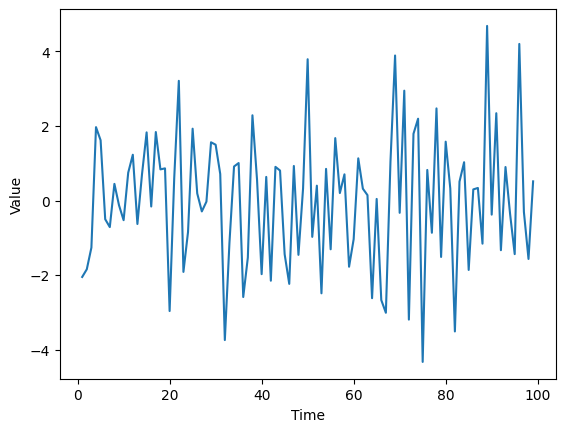

In [22]:
z = s2.diff()[1:]
check_for_st(z)

plt.plot(z)
plt.xlabel("Time")
plt.ylabel("Value")

In [43]:
# Now trying to find coeffs on real company data
x1 = yf.download("KO", "2014-01-01", "2015-01-01")['Close']
x2 = yf.download("PEP", "2014-01-01", "2015-01-01")['Close']

/tmp/ipython-input-660613655.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  x1 = yf.download("KO", "2014-01-01", "2015-01-01")['Close']
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-660613655.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  x2 = yf.download("PEP", "2014-01-01", "2015-01-01")['Close']
[*********************100%***********************]  1 of 1 completed


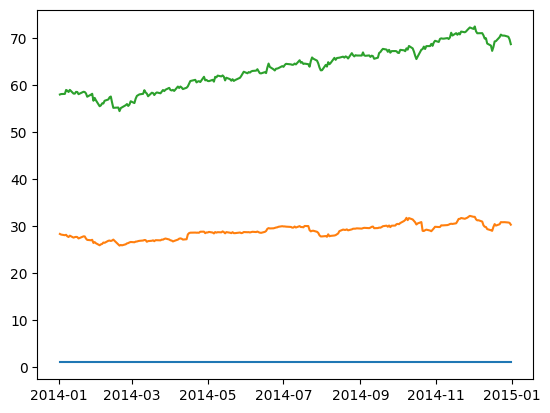

In [46]:
plt.plot(x1)
plt.plot(x2)

In [45]:
x1 = sm.add_constant(x1)
result = sm.OLS(x2, x1).fit()

result.params

,0
const,-18.709004
KO,2.851310


In [47]:
print(x2.head())
print(x1.head())
result.params

x2 = x2["PEP"]
x1 = x1["KO"]

Ticker            PEP
Date                 
2014-01-02  57.937183
2014-01-03  58.035976
2014-01-06  58.064209
2014-01-07  58.911018
2014-01-08  58.741676
            const         KO
Date                        
2014-01-02    1.0  28.312572
2014-01-03    1.0  28.173321
2014-01-06    1.0  28.041008
2014-01-07    1.0  28.124573
2014-01-08    1.0  27.811226


The series is stationary
Date
2014-01-02   -22.790729
2014-01-03   -22.294886
2014-01-06   -21.889389
2014-01-07   -21.280848
2014-01-08   -20.556742
dtype: float64


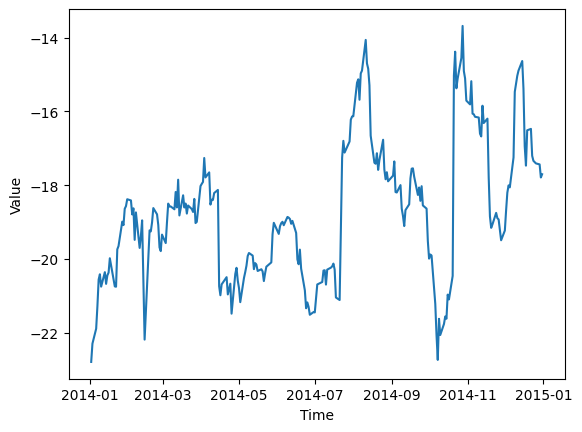

In [48]:
b = result.params["KO"]
z = x2 - b * x1

check_for_st(z)
plt.plot(z)
plt.xlabel("Time")
plt.ylabel("Value")

print(z.head())